# Computational Social Science Project #3 

**Enter your Name:** Saron Goitom

*Semester:* Fall 2023

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

#!pip install --upgrade notebook

# Make sure to import other libraries that will be necessary for training models!

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

/var/folders/04/brft0hvj48b3shf8kdwy5gdr0000gn/T/ipykernel_53066/534905139.py:2: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")


In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

/var/folders/04/brft0hvj48b3shf8kdwy5gdr0000gn/T/ipykernel_53066/2995349599.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)


## Visualization

What do inspections look like over time?

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

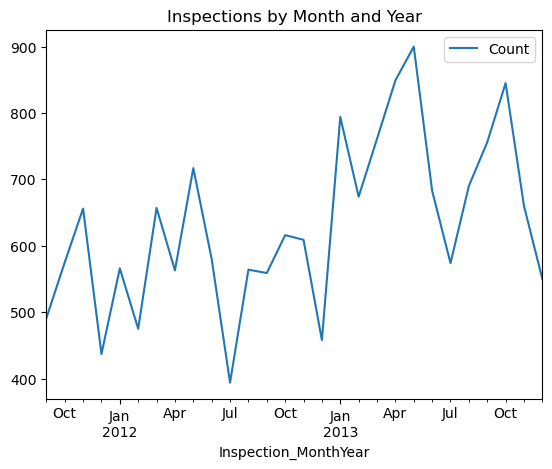

In [7]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

What do the results look like? 

/Users/sarongoitom/anaconda3/envs/CSSclone/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


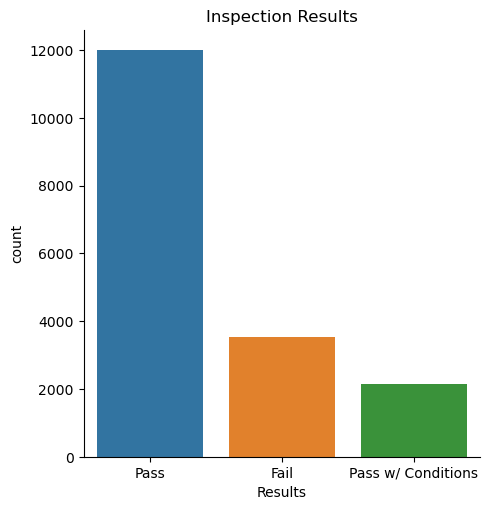

In [8]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

/Users/sarongoitom/anaconda3/envs/CSSclone/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


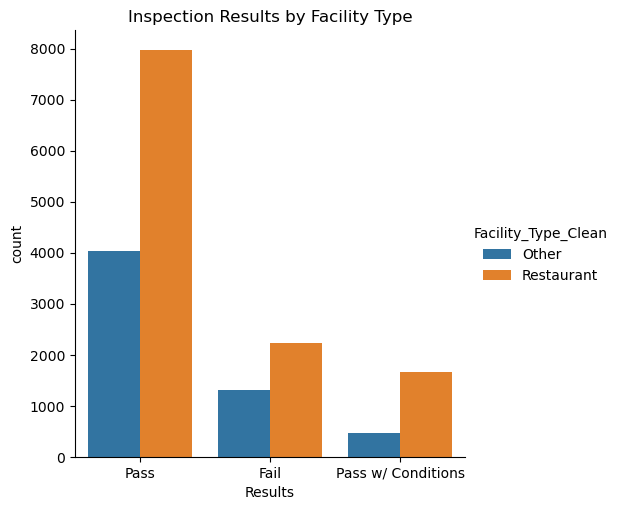

In [9]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [10]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [11]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [12]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

## Fit Models

### Model 1: Logistic Regression

In [13]:
**Logic and Assumptions:** Logistic regression is a classification method which models the probability that 
the outcome Y belongs to a particular category, given a set of input features. In this case, we are estimating 
the probability that a site passes or fails inspection. This model assumes that the distribution of (0/1) are balanced. 
**Pros:** Logistic regression model can be particularly great in predicting responses for binary variables.
**Cons:** The distribution of pass/fail in these data are not close to equal, which may pose an issue given the model 
assumption that there is equal distribution among both categories in the outcome variable.
**Why use this model?:** This model serves as a good first step in assessing this classification problem

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

/Users/sarongoitom/anaconda3/envs/CSSclone/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


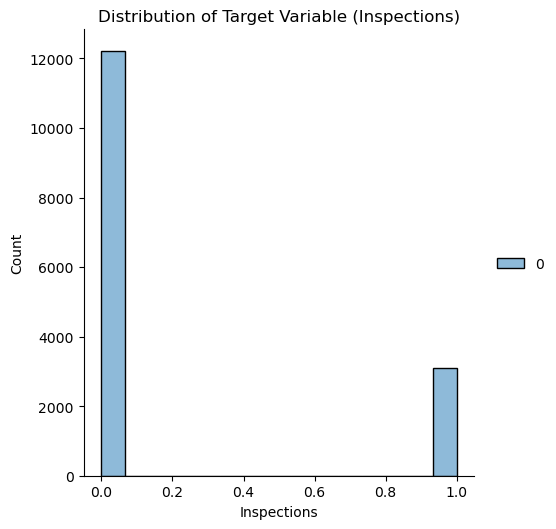

In [14]:
# Import appropriate libraries

# Distribution of outcome variable
sns.displot(y)    # notice the default is a histogram
plt.title("Distribution of Target Variable (Inspections)")
plt.xlabel('Inspections')
plt.ylabel('Count')
plt.show()


In [15]:
# Set seed
np.random.seed(10)

# training and test split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20,
                                                    stratify=y)

# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = y_train)

In [16]:
# create a model
logit_reg = LogisticRegression()
# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())
# predict on the validation data
y_pred = logit_model.predict(X_validate)


/Users/sarongoitom/anaconda3/envs/CSSclone/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


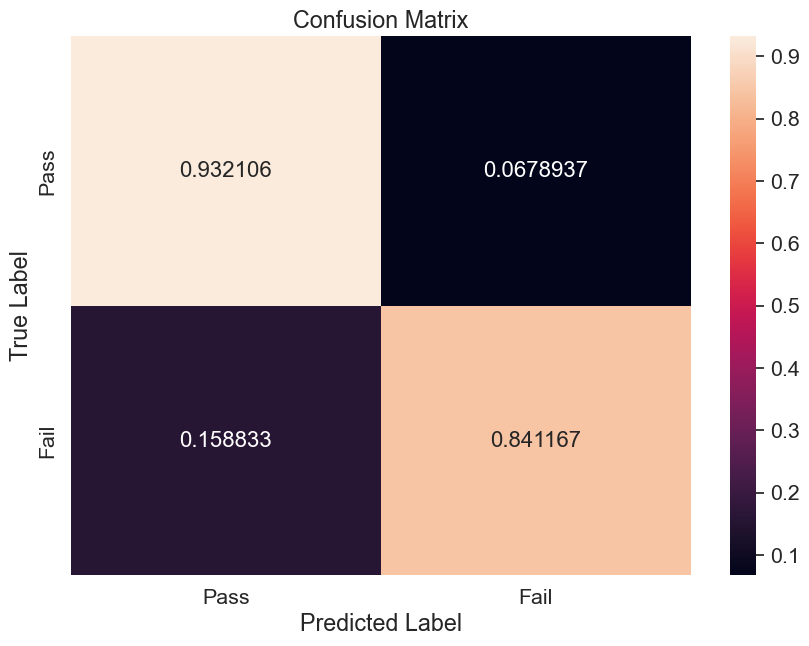

In [17]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9163945133899413


## Model 2: Random Forest

In [ ]:
**Logic and Assumptions:** Building a regression tree involves 1) identifying the cut points for each variable in order to 
create non-overlapping regions that will define the predictor space, and 2) predicting the observation in each region to be 
the most commonly occuring class of observations within the region it lies. There are several methods to identify the cut 
points that would lead to the smallest residual sum of squares (RSS).
**Pros:** Random forest provides an improvement from traditional classification problems in that it can handle more complex 
models with multiple features, allows for easier interpretation and can be graphically depicted. 
**Cons:** Comes at a computational cost
**Why use this model?:** Given that there are several correlated features in the our dataset, random forest would be great 
at handling such a complex classification problem.

In [121]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

In [122]:
#tune hyperparameters 
param_grid = {'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt', 'log2']}
rf_grid_classifier = GridSearchCV(rf_classifier, param_grid, cv=3)
rf_model = rf_grid_classifier.fit(X_train, y_train)

In [47]:
# specify cross-validation
# ----------
scores = cross_val_score(rf_grid_classifier, 
                         X_train, 
                         y_train, # Some algorithms will expect you to ravel the target
                         cv=5)

In [50]:
scores = cross_val_score(rf_grid_classifier.best_estimator_, X_train, y_train, cv=5)
scores.mean()

0.9114951815628809

## Model 3: Decision Tree

In [ ]:
**Logic and Assumptions:** Involves recursively splitting the dataset based on what the feature that provides the best split. 
Decision trees are prone to overfitting and may require pruning or ensemble methods like random forest to prevent this.
**Pros:** Easily interpretable diagrams
**Cons:** Prone to overfitting
**Why use this model?:** While DTs have their limitations, they provide an improvement over traditional classification problems.

In [119]:
# Decision tree
dt_classifier = tree.DecisionTreeClassifier(
                       criterion='gini',              # or 'entropy' for information gain
                       splitter='best',               # or 'random' for random best split
                       max_depth=None,                # set how deep tree nodes can go
                       min_samples_split=2,           # samples (observations) needed to split node
                       min_samples_leaf=1,            # samples (observations) needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             #random seed

In [120]:
#tune hyperparameters 
param_grid = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
               'max_features': ['auto', 'sqrt', 'log2']}
dt_grid_classifier = GridSearchCV(dt_classifier, param_grid, cv=3)
dt_model = dt_grid_classifier.fit(X_train, y_train)

In [57]:
# cross_val_score returns the accuracy score by default but you can change this with the "scoring" argument
scores = cross_val_score(dt_grid_classifier,   # specify estimator 
                         X_train,               # specify X
                         y_train,               # specify y
                         cv=5)            # number of cross validation 

In [58]:
# Take the mean accuracy score from the results of cross validation
scores.mean()

0.857395526485855

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [59]:
# Accuracy
for clf, label in zip([logit_grid.best_estimator_, 
                       dt_grid_classifier.best_estimator_,
                       rf_grid_classifier.best_estimator_], ['Logistic Regression', 
                                            'Decision Tree', 
                                            'Random Forest']):
         scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))

# Precision
for clf, label in zip([logit_grid.best_estimator_, 
                       dt_grid_classifier.best_estimator_,
                       rf_grid_classifier.best_estimator_], ['Logistic Regression', 
                                            'Decision Tree', 
                                            'Random Forest']):
         scores = cross_val_score(clf, X_train, y_train, scoring='precision', cv=5)
         print('Precision: %0.2f [%s]' % (scores.mean(), label))

# Recall
for clf, label in zip([logit_grid.best_estimator_, 
                       dt_grid_classifier.best_estimator_,
                       rf_grid_classifier.best_estimator_], ['Logistic Regression', 
                                            'Decision Tree', 
                                            'Random Forest']):
         scores = cross_val_score(clf, X_train, y_train, scoring='recall', cv=5)
         print('Recall: %0.2f [%s]' % (scores.mean(), label))

# F1
for clf, label in zip([logit_grid.best_estimator_, 
                       dt_grid_classifier.best_estimator_,
                       rf_grid_classifier.best_estimator_], ['Logistic Regression', 
                                            'Decision Tree', 
                                            'Random Forest']):
         scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=5)
         print('F1: %0.2f [%s]' % (scores.mean(), label))

Accuracy: 0.92 [Logistic Regression]
Accuracy: 0.82 [Decision Tree]
Accuracy: 0.91 [Random Forest]
Precision: 0.78 [Logistic Regression]
Precision: 0.57 [Decision Tree]
Precision: 0.80 [Random Forest]
Recall: 0.86 [Logistic Regression]
Recall: 0.50 [Decision Tree]
Recall: 0.74 [Random Forest]
F1: 0.82 [Logistic Regression]
F1: 0.53 [Decision Tree]
F1: 0.77 [Random Forest]


In [ ]:
**Question:** Which of these metrics would we want to prioritize when conducting predictive auditing in this 
context and why?


**Answer:** For this analysis, it would be most accurate to prioritize the F1 metric due to the skewed distribution
of pass/fail scores. 

## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

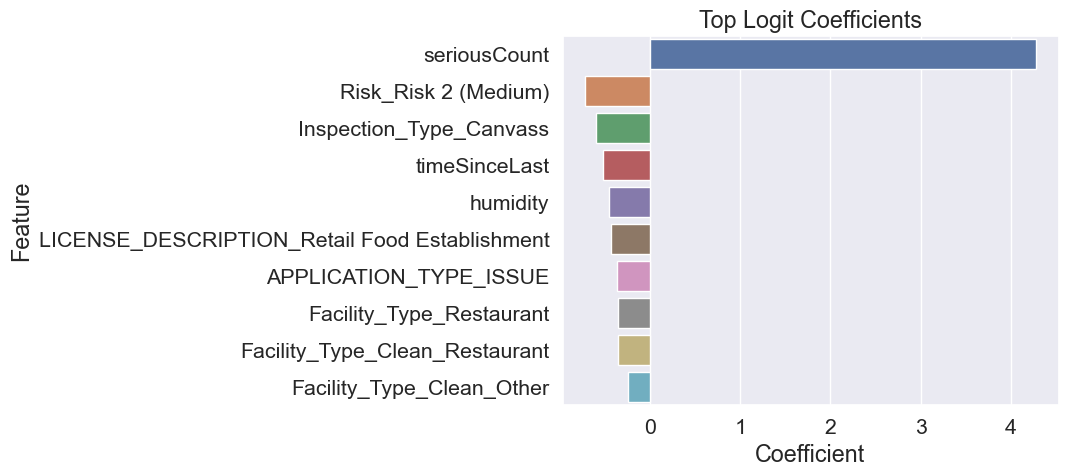

In [60]:
# extract the coefficents (from logistic regression model) and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

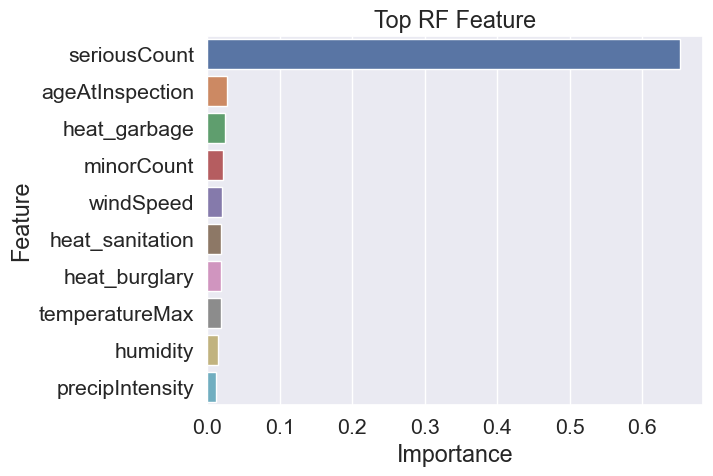

In [70]:
# Decision Tree Feature Importance Plot
rf_classifier.fit(X_train, y_train.ravel())

feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance')).set_title("Top RF Feature")
plt.show()

In [ ]:
**Question:** Which features contribute to your predictions? Are there any additional features you wish you could 
incorporate that you don't have available in this analysis?

**Answer:** Based on the figures above, we see that the Risk_risk2 (Medium) and Inspection Type Canvas coefficients are 
the top predictors for the logistic regression model, and the age at inspection & heat garbage features are the top 
predictors for the random forest model. 

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

In [73]:
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
# Get predicted values for the random forest model
rf_pred = rf_model.predict(X_test)

# Using predict_proba() to predict probabilities for test data
proba_predictions = rf_classifier.predict_proba(X_test)

proba_predictions

array([[1.  , 0.  ],
       [0.14, 0.86],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.27, 0.73]])

In [74]:
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# Get the probabilities for class 1 (second column)
class_1_probabilities = proba_predictions[:, 1]

# Sort the indices based on the probabilities of class 1 in descending order
sorted_indices = np.argsort(class_1_probabilities)[::-1]

# Sort the proba_predictions array based on sorted indices
sorted_proba_predictions = proba_predictions[sorted_indices]

sorted_proba_predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

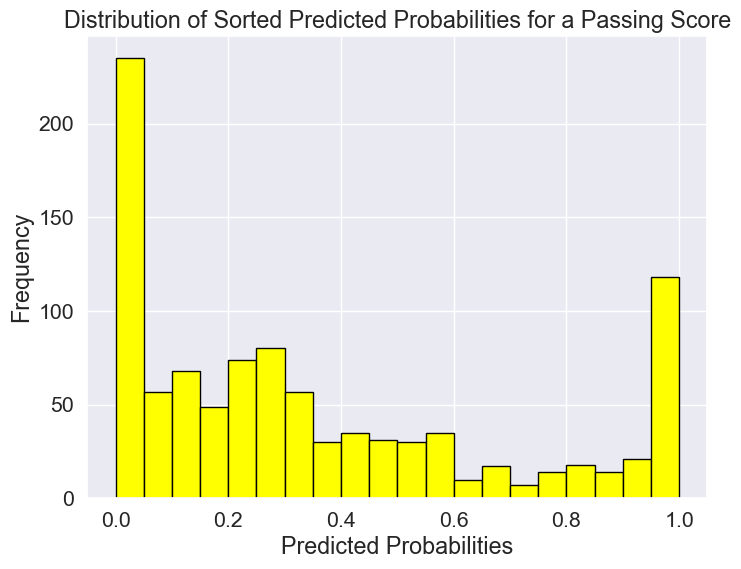

In [77]:
# get the first 1,000 observations (indices 0 to 999)
num_observations = 1000
probabilities = sorted_proba_predictions[:num_observations, 0]  # Probabilities for Pass

# Plotting the distribution of sorted predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(probabilities, bins=20, color='yellow', edgecolor='black')
plt.title('Distribution of Sorted Predicted Probabilities for a Passing Score')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

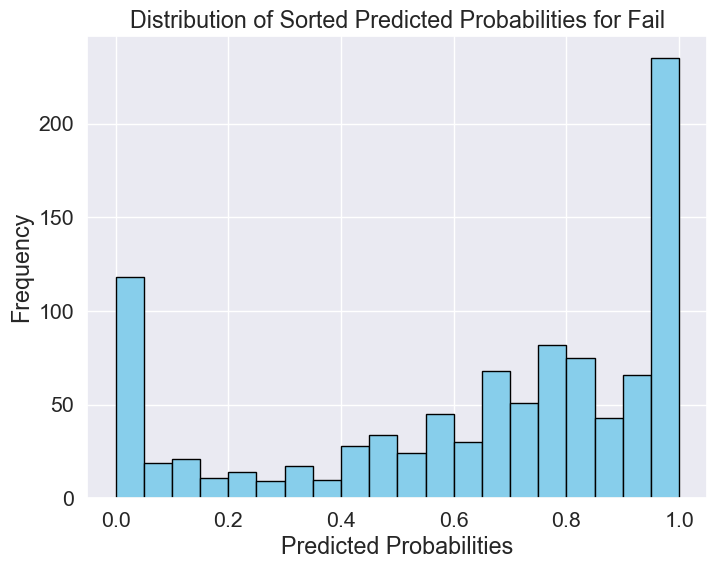

In [76]:
probabilities_1 = sorted_proba_predictions[:num_observations, 1]  # Probabilities for Fail

# Plotting the distribution of sorted predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(probabilities_1, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sorted Predicted Probabilities for a Fail Score')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [78]:
# Get the total number of observations in your dataset
total_observations = chicago_inspections_2011_to_2013.shape[0]

# Set the number of observations to audit (1000 in this case)
num_observations_to_audit = 1000

# Randomly select 1000 rows from the dataset without replacement
subset_data = chicago_inspections_2011_to_2013.sample(n=num_observations_to_audit, replace=False)

### Predict on 2014 Inspection Data

In [79]:
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [125]:
# List column names
chicago_inspections_2014.columns
chicago_inspections_2011_to_2013.columns

common_columns =chicago_inspections_2014.columns.intersection(chicago_inspections_2011_to_2013.columns)
common_columns

Index(['Facility_Type', 'Risk', 'Inspection_Type', 'Facility_Type_Clean',
       'criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound', 'Results'],
      dtype='object')

In [127]:
# Fill in the code below with the X data you used for training
X_test14 = chicago_inspections_2014[['Facility_Type', 'Risk', 'Inspection_Type', 'Facility_Type_Clean',
       'criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound', 'Results']]

# drop datetime info
# -----------
X_test14 = X_test14.dropna()

In [128]:
# Set target variable. 
y14 = X_test14['Results']
## Comment out the following code if you don't want to binarize the target variable
y14 = y14.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y14 = lb_style.fit_transform(y14)
# Recode 0s and 1s so 1s are "Fail"
y14 = np.where(y14 == 1, 0 ,1)

# All other features in X
X14 = pd.get_dummies(X_test14)

X14.head()


,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Facility_Type_A-Not-For-Profit Chef Training Program,Facility_Type_AFTER SCHOOL PROGRAM,Facility_Type_BAKERY/DELI,Facility_Type_BANQUET,Facility_Type_BANQUET HALL,Facility_Type_BEFORE AND AFTER SCHOOL PROGRAM,Facility_Type_BEVERAGE/SILVERWARE WAREHOUSE,Facility_Type_BUTCHER/GROCERY,Facility_Type_Bakery,Facility_Type_Banquet Dining,Facility_Type_Banquet rooms,Facility_Type_CAFETERIA,Facility_Type_CATERING/CAFE,Facility_Type_Cafeteria,Facility_Type_Catering,Facility_Type_Daycare (2 - 6 Years),Facility_Type_Daycare Combo 1586,Facility_Type_FITNESS CENTER,Facility_Type_GAS STATION,Facility_Type_GAS STATION/RESTAURANT,Facility_Type_GAS STATION/STORE,Facility_Type_GELATO SHOP,Facility_Type_GROCERY STORE/COOKING SCHOOL,Facility_Type_GROCERY STORE/RESTAURANT,Facility_Type_GROCERY/RESTAURANT,Facility_Type_GYM,Facility_Type_Grocery & Restaurant,Facility_Type_Grocery Store,Facility_Type_Grocery(Sushi prep),Facility_Type_HEALTH/ JUICE BAR,Facility_Type_HERBALIFE,Facility_Type_Hospital,Facility_Type_ICE CREAM SHOP,Facility_Type_JUICE BAR,Facility_Type_LIQUOR STORE,Facility_Type_LIVE POULTRY,Facility_Type_Liquor,Facility_Type_Long Term Care,Facility_Type_MOVIE THEATER,Facility_Type_MUSIC VENUE,Facility_Type_NURSING HOME,Facility_Type_Other,Facility_Type_REHAB CENTER,Facility_Type_RESEARCH KITCHEN,Facility_Type_RESTAURANT.BANQUET HALLS,Facility_Type_RESTAURANT/BAR,Facility_Type_ROOFTOP,Facility_Type_Restaurant,Facility_Type_Restaurant(protein shake bar),Facility_Type_SMOKEHOUSE,Facility_Type_STORE,Facility_Type_School,Facility_Type_Shared Kitchen,Facility_Type_Shelter,Facility_Type_Special Event,Facility_Type_Supporting Living,Facility_Type_TAVERN,Facility_Type_Wholesale,Facility_Type_banquets,Facility_Type_butcher shop,Facility_Type_catering,Facility_Type_convenience store,Facility_Type_employee kitchen,Facility_Type_fitness center,Facility_Type_tavern,Facility_Type_wholesale /retail grocer,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,WARD_PRECINCT_-27,WARD_PRECINCT_1-10,WARD_PRECINCT_1-11,WARD_PRECINCT_1-12,WARD_PRECINCT_1-13,WARD_PRECINCT_1-17,WARD_PRECINCT_1-18,WARD_PRECINCT_1-2,WARD_PRECINCT_1-20,WARD_PRECINCT_1-21,WARD_PRECINCT_1-22,WARD_PRECINCT_1-23,WARD_PRECINCT_1-24,WARD_PRECINCT_1-25,WARD_PRECINCT_1-26,WARD_PRECINCT_1-29,WARD_PRECINCT_1-3,WARD_PRECINCT_1-30,WARD_PRECINCT_1-32,WARD_PRECINCT_1-33,WARD_PRECINCT_1-35,WARD_PRECINCT_1-36,WARD_PRECINCT_1-40,WARD_PRECINCT_1-41,WARD_PRECINCT_1-44,WARD_PRECINCT_1-46,WARD_PRECINCT_1-47,WARD_PRECINCT_1-49,WARD_PRECINCT_1-5,WARD_PRECINCT_1-56,WARD_PRECINCT_1-6,WARD_PRECINCT_1-7,WARD_PRECINCT_1-8,WARD_PRECINCT_1-9,WARD_PRECINCT_10-10,WARD_PRECINCT_10-15,WARD_PRECINCT_10-17,WARD_PRECINCT_10-18,WARD_PRECINCT_10-23,WARD_PRECINCT_10-25,WARD_PRECINCT_10-26,WARD_PRECINCT_10-30,WARD_PRECINCT_10-31,WARD_PRECINCT_10-33,WARD_PRECINCT_10-35,WARD_PRECINCT_10-38,WARD_PRECINCT_10-40,WARD_PRECINCT_10-41,WARD_PRECINCT_10-43,WARD_PRECINCT_10-45,WARD_PRECINCT_10-46,WARD_PRECINCT_10-48,WARD_PRECINCT_10-49,WARD_PRECINCT_10-5,WARD_PRECINCT_11-13,WARD_PRECINCT_11-14,WARD_PRECINCT_11-15,WARD_PRECINCT_11-18,WARD_PRECINCT_11-19,WARD_PRECINCT_11-22,WARD_PRECINCT_11-25,WARD_PRECINCT_11-27,WARD_PRECINCT_11-28,WARD_PRECINCT_11-3,WARD_PRECINCT_11-30,WARD_PRECINCT_11-31,WARD_PRECINCT_11-33,WARD_PRECINCT_11-35,WARD_PRECINCT_11-36,WARD_PRECINCT_11-37,WARD_PRECINCT_11-38,WARD_PRECINCT_11-4,WARD_PRECINCT_11-40,WARD_PRECINCT_11-41,WARD_PR

In [139]:
# Get missing columns in the training set 
missing_cols = set( X.columns ) - set( X14.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X14[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X14 = X14[X.columns]

In [140]:
# predict and compare using already trained rf_classifier
# -----------

# Get predicted values for the random forest model that we chose
#dt_model = dt_grid_classifier.fit(X14, y14)
rf14_pred=rf_model.best_estimator_.predict(X14)

#calculate accuracy score for rf14_pred
accuracy_score(y14, rf14_pred)

0.8933197866395732

In [141]:
#precision
precision_score(y14, rf14_pred)

0.7506887052341598

In [142]:
#recall
recall_score(y14,rf14_pred)

0.6951530612244898

In [143]:
#calculate F1
f1_score(y14,rf14_pred)

0.7218543046357615

In [ ]:
## 5. Discussion Questions

In [ ]:
1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

In [ ]:
It's important to use metrics beyond accuracy (i.e. recall, precision and F1) in the social sciences because accuracy
only tells us the proportion of true results. In the case of food inspection and within the broader context of public health, 
it would be more beneficial to minimize false negatives, or the proportion of sites that were incorrectly classified as 
having passed the inspection. Such information can be obtained from metrics such as recall.

Additionally, in our dataset, we have an imbalanced outcome (distribution of pass/fail scores). In this case, given that many 
of the sites have a passing score, such algorithms will predict almost perfect accuracy and recall. So measures such as F1 would
be more appropriate in this case. 

In [ ]:
2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting 
their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. 
How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

In [ ]:
This could be avoided by implementing random audits and also increasing the number of audits so as to reduce the chance
for establishments to adjust their behavior. 

Despite measures to reduce such actions, these efforts may still be useless if key features that predict inspection score
are not captured in this dataset. 